# Simple Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Data Analysis

The dataset used is the soccer player dataset. It has information about various players from different clubs, and it provides data over ten features with a number of goals as the target variable.

In [2]:
df = pd.read_csv('EPL_Soccer_MLR_LR.csv') #reads the dataset file into the system and stores it as pandas dataframe object
df.info() #gives the summary of the read dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202 entries, 0 to 201
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PlayerName              202 non-null    object 
 1   Club                    202 non-null    object 
 2   DistanceCovered(InKms)  202 non-null    float64
 3   Goals                   202 non-null    float64
 4   MinutestoGoalRatio      202 non-null    float64
 5   ShotsPerGame            202 non-null    float64
 6   AgentCharges            202 non-null    int64  
 7   BMI                     202 non-null    float64
 8   Cost                    202 non-null    float64
 9   PreviousClubCost        202 non-null    float64
 10  Height                  202 non-null    float64
 11  Weight                  202 non-null    float64
 12  Score                   202 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.6+ KB


We can see our dataset has 202 rows and no-nulls (no void or null values in dataset). If we have nulls we need to spend some time dealing with them. They certainly don't break our analysis, but we have to be intentional how we're going to handle them when working with regression models. We can lookout for why is the data null? why is it missing? how can we handle it?

We have data points or attributes like PlayerName, Club, DistanceCovered, Goals, MinutestoGoalRatio, ShotsPerGame, AgentCharges, BMI, Cost, PreviousClubCost, Height, Weight, and Score. Here, we can see that how the variables are related to each other. Sometime therer is a issue of multicollinearity in multiple linear regression which occurs because the correlation of multiple predictor variables is high.

In [3]:
df.describe() #describes various statistics of each attribute

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,4.718614,7.108663,43.091584,14.566337,76.876238,22.955891,69.021782,64.873713,180.103960,75.008168,13.507426
std,0.457976,1.800549,3.662989,1.362451,47.501239,2.863933,32.565333,13.070197,9.734494,13.925574,6.189826
min,3.800000,3.300000,35.900000,11.600000,8.000000,16.750000,28.000000,34.360000,148.900000,37.800000,5.630000
25%,4.372500,5.900000,40.600000,13.500000,41.250000,21.082500,43.850000,54.667500,174.000000,66.525000,8.545000
50%,4.755000,6.850000,43.500000,14.700000,65.500000,22.720000,58.600000,63.035000,179.700000,74.400000,11.650000
75%,5.030000,8.275000,45.575000,15.575000,97.000000,24.465000,90.350000,74.750000,186.175000,84.125000,18.080000
max,6.720000,14.300000,59.700000,19.200000,234.000000,34.420000,200.800000,106.000000,209.400000,123.200000,35.520000


Describe function gives us the descriptive statistics that summarizes the central tendency, dispersion and shape of a dataset's distribution, excluding NAN values.

In [4]:
df.corr() #draws the correlation matrix between each attribute

,DistanceCovered(InKms),Goals,MinutestoGoalRatio,ShotsPerGame,AgentCharges,BMI,Cost,PreviousClubCost,Height,Weight,Score
DistanceCovered(InKms),1.000000,0.147098,0.924964,0.888800,0.250865,0.299471,-0.403004,0.550975,0.358854,0.403743,-0.493512
Goals,0.147098,1.000000,0.153333,0.134721,0.131973,0.177032,0.137131,0.102734,0.076958,0.155844,0.108114
MinutestoGoalRatio,0.924964,0.153333,1.000000,0.950757,0.258240,0.320527,-0.449135,0.583375,0.371192,0.423699,-0.532449
ShotsPerGame,0.888800,0.134721,0.950757,1.000000,0.308391,0.382524,-0.435429,0.610986,0.352322,0.455255,-0.531522
AgentCharges,0.250865,0.131973,0.258240,0.308391,1.000000,0.302556,-0.108243,0.317581,0.123255,0.273686,-0.183386
BMI,0.299471,0.177032,0.320527,0.382524,0.302556,1.000000,0.321116,0.713858,0.337097,0.845955,0.187558
Cost,-0.403004,0.137131,-0.449135,-0.435429,-0.108243,0.321116,1.000000,-0.207749,-0.071253,0.154227,0.963017
PreviousClubCost,0.550975,0.102734,0.583375,0.610986,0.317581,0.713858,-0.207749,1.000000,0.802119,0.930904,-0.361850
Height,0.358854,0.076958,0.371192,0.352322,0.123255,0.337097,-0.071253,0.802119,1.000000,0.780906,-0.188022
Weight,0.403743,0.155844,0.423699,0.455255,0.273686,0.845955,0.154227,0.930904,0.780906,1.000000,-0.000162


In our dataset, cost is 96% correlated with Score, which means they are highly correlated. Hence, we can use cost to predict score using simple linear regression model.

# Using cost of players to predict score of players using Linear Regression as both are highly correlated

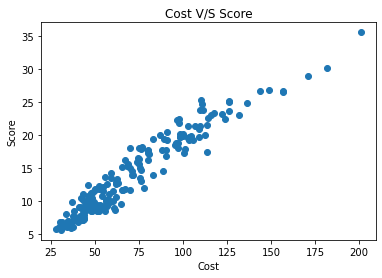

In [5]:
plt.scatter(df['Cost'], df['Score']); #This gives the scatter plot of cost and score
plt.xlabel('Cost');
plt.ylabel('Score');
plt.title('Cost V/S Score');
plt.show();

This plot shows that cost and score are highly related as shown in the correlation matrix. There is a light bend in the scatter plot and fewer data points as the cost and score increases. Also, there is not much of non-constant variance. Hence, we're good to go with regression model.

In [6]:
#Assigning x values as cost data points and y as score data points
x = df['Cost'];
y = df['Score'];

In [7]:
#Dividing the x and y sets in train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.75, test_size = 0.25, random_state = 100);

We do train and test fit so that we do not overfit the dataset on the model. If we use all the data points to trian the model, then model may only learn the small nuances of the data, but when in future tested with some different world scenario, it may not give the expected results.

# StatsModels approach to regression using Ordinary Least Squares method

In the OLS method, we have to choose the values of beta0 and beta1 such that, the total sum of squares of the difference between the calculated and observed value of y is minimised.

Formula of OLS:

Where, y^i  = predicted value for the ith observation, yi  = actual value for the ith observation, epsilon_i  = error/residual for the ith observation, n = total number of observations

To get the values of b_0  and b_1  which minimise S, we can take a partial derivative for each coefficient and equate it to zero.

In [8]:
#Fitting the model
lr1 = sm.OLS(y_train, x_train).fit()

In [9]:
lr1.params

Cost    0.192891
dtype: float64

In [10]:
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  Score   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.167e+04
Date:                Thu, 12 May 2022   Prob (F-statistic):                   3.84e-144
Time:                        12:14:26   Log-Likelihood:                         -297.42
No. Observations:                 151   AIC:                                      596.8
Df Residuals:                     150   BIC:                                      599.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Cost           0.1929      0.002    108.014      0.000       0.189       0.196
==============================================================================
Omnibus:                        0.244   Durbin-Watson:                   1.812
Prob(Omnibus):                  0.885   Jarque-Bera (JB):                0.054
Skew:                           0.021   Prob(JB):                        0.974
Kurtosis:                       3.083   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [11]:
#Forced intercept term to get beta0 or else we were doing beta1*X
x_train_with_intercept = sm.add_constant(x_train); #this line adds the constant term to the equation,i.e. beta0 for all points
lr1 = sm.OLS(y_train, x_train_with_intercept).fit();
lr1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.930
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     1976.
Date:                Thu, 12 May 2022   Prob (F-statistic):           6.91e-88
Time:                        12:14:26   Log-Likelihood:                -293.23
No. Observations:                 151   AIC:                             590.5
Df Residuals:                     149   BIC:                             596.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9472      0.325      2.916      0.004       0.305       1.589
Cost           0.1821      0.004     44.456      0.000       0.174       0.190
==============================================================================
Omnibus:                        3.849   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.146   Jarque-Bera (JB):                3.867
Skew:                           0.359   Prob(JB):                        0.145
Kurtosis:                       2.685   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary say that our equation of score is as follows:

Score = beta0 + beta1 * Cost

Score = 0.9472 + 0.1821 * Cost

So, if we increase our cost by1 unit we can expect 0.1821 increase in score.

In the statistics calculated above, we can see that our R-squared value is 93%, that means our model captures 93% of variance. The key value for F-statistic, i.e. Prob(F-statistic) is very small, that means our null hypothesis is not true, i.e. slope is not zero and it is extremely unlikely that our model is not good. The T-statistic value is also very low, so null hypothesis does not stand here.

In [12]:
#Extracting the params beta0 and beta1

lr1.params

#We can also extract using below code

b0 = lr1.params[0]
b1 = lr1.params[1]
print(b0,b1)

0.9471853461853086 0.18208264626002557


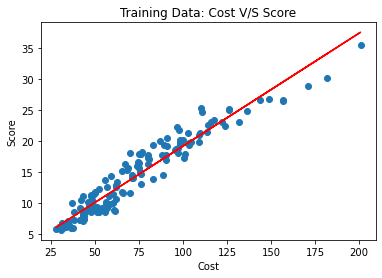

In [13]:
#Plotting the fitted line of training data

plt.scatter(x_train, y_train)
plt.plot(x_train, b0+b1*x_train, 'r')
plt.xlabel('Cost');
plt.ylabel('Score');
plt.title('Training Data: Cost V/S Score');
plt.show()

The model looks reasonable upto 150, above that it seems to be over estimating. This says that Premier League is overpaying certain players.

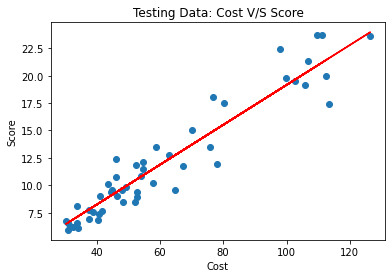

In [14]:
#Plotting the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr1.predict(x_test_with_intercept)

plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.xlabel('Cost');
plt.ylabel('Score');
plt.title('Testing Data: Cost V/S Score');
plt.show()

So, this plot says that our model is working well on testing data. But, in the trianing plot we see that our model starts to breakdown around the cost of 150, and out testing data has the maximum value of 120. Hence, we cannot be sure. 

# Residual Diagnostics

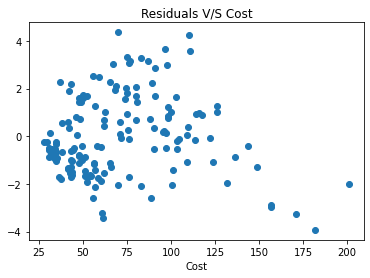

In [15]:
#Assessing Non-Linearity - we fit our predicted values againt fitting data

pred_y = lr1.predict(x_train_with_intercept)

#Finding residuals
r_i = (y_train - pred_y)

#Residual v/s cost plot
plt.title('Residuals V/S Cost')
plt.xlabel('Cost')
plt.scatter(x_train, r_i)
plt.show()

It looks like the pattern is more parabolic. There are some kind of increasing residual values till 130. Below 150 things look pretty good, but beyond that it is little bit dicier. This plot also says that we are potentially suffering from non-constant variance as the plot is megaphone type of shape.

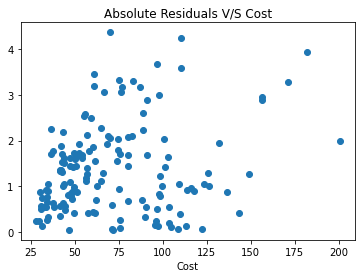

In [16]:
#Absolute residuals againt predictor

abs_r_i = np.abs(y_train - pred_y)
plt.title('Absolute Residuals V/S Cost')
plt.xlabel('Cost')
plt.scatter(x_train, abs_r_i)
plt.show()

Once we take the sign out of the equation of residuals, the model looks more better. We need to search for some more data of cost of players above 150, or we can say that predictions not that good above 150.

((array([-2.60603471, -2.28639722, -2.10324767, -1.97158309, -1.867224  ,
         -1.7799545 , -1.70445293, -1.63757876, -1.57731662, -1.52229259,
         -1.47152616, -1.42429196, -1.3800376 , -1.33833223, -1.29883298,
         -1.26126233, -1.22539231, -1.19103324, -1.1580255 , -1.12623343,
         -1.09554071, -1.06584677, -1.03706405, -1.0091158 , -0.98193434,
         -0.95545967, -0.92963831, -0.90442237, -0.87976879, -0.85563868,
         -0.83199678, -0.80881102, -0.78605212, -0.76369328, -0.74170987,
         -0.7200792 , -0.69878032, -0.67779383, -0.65710172, -0.6366872 ,
         -0.61653466, -0.59662946, -0.57695791, -0.55750713, -0.53826504,
         -0.51922023, -0.50036191, -0.48167989, -0.4631645 , -0.44480656,
         -0.42659733, -0.40852846, -0.39059201, -0.37278035, -0.35508619,
         -0.33750252, -0.32002258, -0.3026399 , -0.28534819, -0.26814138,
         -0.25101361, -0.23395916, -0.2169725 , -0.20004822, -0.18318105,
         -0.16636584, -0.14959754, -0.

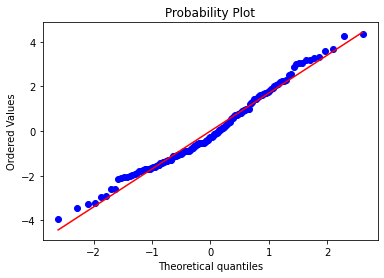

In [17]:
#Normality Plot
import scipy

scipy.stats.probplot(r_i, plot=plt)

Residuals seems to be falling on the line.

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


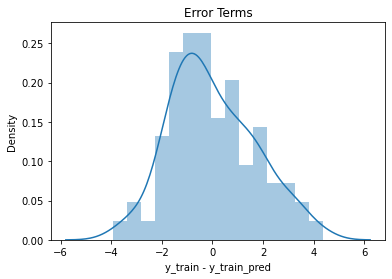

In [18]:
#Histograms of residuals
import seaborn as sns
fig = plt.figure()
sns.distplot(r_i, bins = 15)
plt.title('Error Terms')
plt.xlabel('y_train - y_train_pred')
plt.show()

This almost equal to bell-curved shape distribution, if we get some more points we might have a perfect bell-curved shape. This means normality looks good and no-serious deviations from normality.

Text(0.5, 1.0, 'Residual Boxplot')

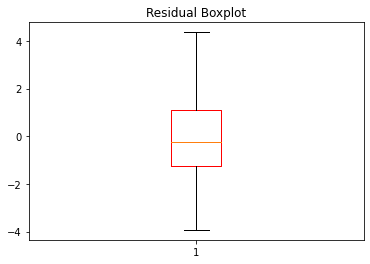

In [19]:
#Assesing Outliers using box-plot

plt.boxplot(r_i, boxprops=dict(color='red'))
plt.title('Residual Boxplot')

This plot gives us the essence of how large our outliers are, we have some extreme values at 4 and -4, but there are not many of them. Generally ther residuals are close to zero and 1.

# Dealing with non-constant variance using transformations

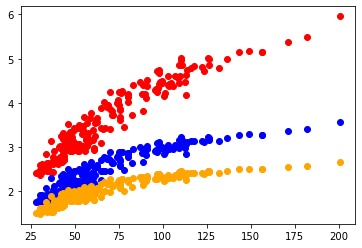

In [20]:
#Trying sqrt over response variable
sqrt_y=np.sqrt(y)
plt.scatter(x, sqrt_y,color='red');

#Trying ln over response variable
ln_y=np.log(y)
plt.scatter(x, ln_y,color='blue');


#Trying a BC transformation

#Box Cox procedure on all cost
from scipy import stats
bc_y=list(stats.boxcox(y))
bc_y=bc_y[0]
plt.scatter(x, bc_y,color='orange');

# Running Regression on above transformations

In [21]:
#Regression on square root transformation

x_train, x_test, y_train, y_test = train_test_split(x, sqrt_y, train_size = 0.75, test_size = 0.25, random_state = 100)

#force intercept term
x_train_with_intercept = sm.add_constant(x_train)
lr2 = sm.OLS(y_train, x_train_with_intercept).fit()
lr2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.894
Method:                 Least Squares   F-statistic:                     1267.
Date:                Thu, 12 May 2022   Prob (F-statistic):           9.72e-75
Time:                        12:14:29   Log-Likelihood:                -17.200
No. Observations:                 151   AIC:                             38.40
Df Residuals:                     149   BIC:                             44.43
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.9674      0.052     37.683      0.000       1.864       2.071
Cost           0.0234      0.001     35.594      0.000       0.022       0.025
==============================================================================
Omnibus:                        1.648   Durbin-Watson:                   1.821
Prob(Omnibus):                  0.439   Jarque-Bera (JB):                1.360
Skew:                           0.032   Prob(JB):                        0.507
Kurtosis:                       2.539   Cond. No.                         186.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We get little less value of R-squared and we loose some of the predictability power. 

const    1.967367
Cost     0.023433
dtype: float64


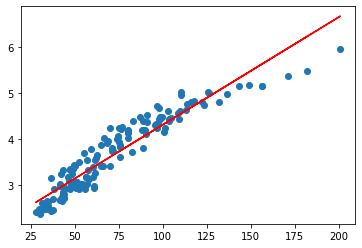

In [22]:
#Extract the B0, B1
print(lr2.params)
b0=lr2.params[0]
b1=lr2.params[1]

#Plot the fitted line on training data
plt.scatter(x_train, y_train)
plt.plot(x_train, b0+ b1*x_train, 'r')
plt.show()

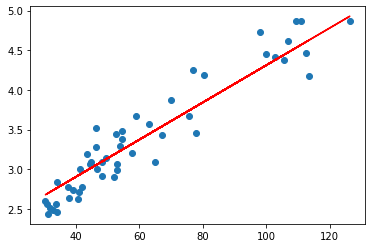

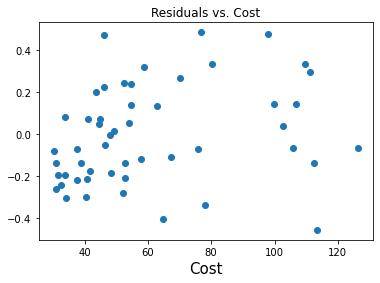

140   -0.304735
101   -0.175596
31     0.335437
88     0.224866
183   -0.065908
133   -0.182004
169   -0.217869
127   -0.338285
195   -0.068392
174   -0.136069
154   -0.258639
179    0.017436
128   -0.212356
46     0.266578
125   -0.209648
65     0.244769
164   -0.136659
120    0.055093
177   -0.454514
104   -0.297254
119    0.049264
77     0.469959
96     0.200761
156   -0.195819
81     0.072857
11     0.485016
73     0.040705
75     0.081363
15     0.144738
153   -0.241312
110   -0.280729
99     0.321201
122   -0.401116
157   -0.077395
41     0.144975
85     0.240296
59     0.139915
160   -0.067626
175   -0.138702
3     -0.065178
165    0.074747
196   -0.117905
32     0.334955
64     0.133593
26     0.297461
197   -0.108426
115   -0.052018
170   -0.194253
161   -0.138187
118   -0.002582
7      0.474548
dtype: float64


In [23]:
#Plot the fitted line on test data

x_test_with_intercept = sm.add_constant(x_test)
y_test_fitted = lr2.predict(x_test_with_intercept)


plt.scatter(x_test, y_test)
plt.plot(x_test, y_test_fitted, 'r')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals=(y_test-y_test_fitted)
len(y_test)
len(y_test_fitted)
len(test_residuals)

#Residuals vs. predictor
plt.title('Residuals vs. Cost')
plt.xlabel('Cost',fontsize=15)
plt.scatter(x_test, test_residuals)
plt.show()

print(test_residuals)

In return of loosing R-squared power, we see far less evidence of non-constant varaince.

# ANOVA Table

In [24]:
data = df[['Cost', 'Score']]
data

,Cost,Score
0,109.1,19.75
1,102.8,21.30
2,104.6,19.88
3,126.4,23.66
4,80.3,17.64
...,...,...
197,67.2,11.79
198,56.5,10.05
199,47.6,8.51
200,60.4,11.50


In [25]:
mod = ols('Score ~ 1', data=data).fit()

In [26]:
aov_table = sm.stats.anova_lm(mod, test="F", typ='III')
aov_table

,sum_sq,df,F,PR(>F)
Intercept,36855.011139,1.0,961.921582,1.492612e-78
Residual,7701.103061,201.0,NaN,NaN


# Analyzing the relation between BMI and Weight as they are highly correlated

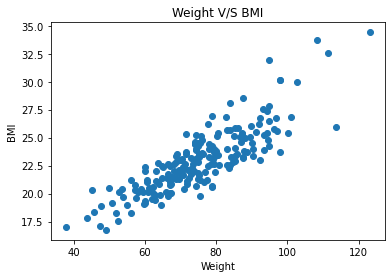

In [27]:
plt.scatter(df['Weight'], df['BMI']); #This gives the scatter plot of cost and score
plt.xlabel('Weight');
plt.ylabel('BMI');
plt.title('Weight V/S BMI');
plt.show();

This plot shows that BMI and weight are somewhat related as shown in the correlation matrix. The variance increases a little as BMI and weight increases. Also, there is not much of non-constant variance. Hence, we're good to go with regression model.

In [28]:
#Assigning x values as BMI data points and y as weight data points
x1 = df['Weight'];
y1 = df['BMI'];

In [29]:
#Dividing the x1 and y1 sets in train and test sets
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size = 0.75, test_size = 0.25, random_state = 100);

In [30]:
#Forced intercept term to get beta0 or else we were doing beta1*X
x1_train_with_intercept = sm.add_constant(x1_train); #this line adds the constant term to the equation,i.e. beta0 for all points
lr3 = sm.OLS(y1_train, x1_train_with_intercept).fit();
lr3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    BMI   R-squared:                       0.698
Model:                            OLS   Adj. R-squared:                  0.696
Method:                 Least Squares   F-statistic:                     343.8
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.56e-40
Time:                        12:14:31   Log-Likelihood:                -277.94
No. Observations:                 151   AIC:                             559.9
Df Residuals:                     149   BIC:                             565.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.0050      0.713     14.037      0.000       8.597      11.413
Weight         0.1729      0.009     18.541      0.000       0.155       0.191
==============================================================================
Omnibus:                        6.660   Durbin-Watson:                   2.005
Prob(Omnibus):                  0.036   Jarque-Bera (JB):                6.309
Skew:                           0.434   Prob(JB):                       0.0427
Kurtosis:                       3.501   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This summary say that our equation of BMI is as follows:

BMI = beta0 + beta1 * weight

BMI = 10.0050 + 0.1729 * weight

So, if we increase our weight by 1 unit we can expect 0.1729 increase in BMI.

In the statistics calculated above, we can see that our R-squared value is 69.6%, that means our model captures 69.6% of variance. The key value for F-statistic, i.e. Prob(F-statistic) is very small, that means our null hypothesis is not true, i.e. slope is not zero and it is extremely unlikely that our model is not good. The T-statistic value is also very low, so null hypothesis does not stand here.

In [31]:
#Extracting the params beta0 and beta1

lr3.params

#We can also extract using below code

b2 = lr3.params[0]
b3 = lr3.params[1]
print(b2,b3)

10.005031327761753 0.17294929921544933


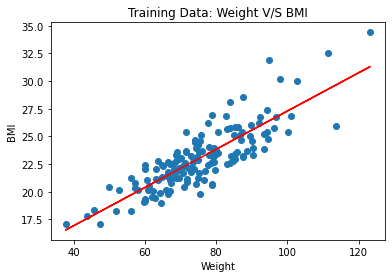

In [32]:
#Plotting the fitted line of training data

plt.scatter(x1_train, y1_train)
plt.plot(x1_train, b2+b3*x1_train, 'r')
plt.xlabel('Weight');
plt.ylabel('BMI');
plt.title('Training Data: Weight V/S BMI');
plt.show()

The model looks reasonable upto the weight value 100, but beyond that it doesn't looks good. Seems like player with more weight are having higher BMI indexes which they shouldn't have. But, this can also be there because of the another variable affecting BMI which is height.

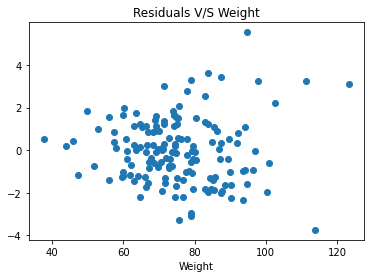

In [33]:
#Assessing Non-Linearity - we fit our predicted values againt fitting data

pred_y1 = lr3.predict(x1_train_with_intercept)

#Finding residuals
r_i1 = (y1_train - pred_y1)

#Residual v/s cost plot
plt.title('Residuals V/S Weight')
plt.xlabel('Weight')
plt.scatter(x1_train, r_i1)
plt.show()

This plot shows that we're potentially suffering from non-constant variance, i.e. the problem of heteroskedasticity. Hence, we will do some transformation and try to remove the non-constant variance.

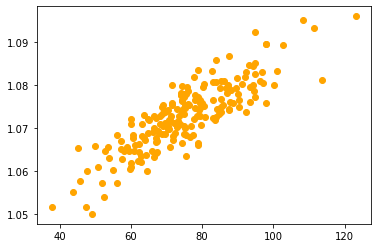

In [34]:
#Trying a BC transformation

#Box Cox procedure on all cost
from scipy import stats
bc_y1=list(stats.boxcox(y1))
bc_y1=bc_y1[0]
plt.scatter(x1, bc_y1, color='orange');

In [35]:
#Regression on BC transformation

x1_train, x1_test, y1_train, y1_test = train_test_split(x1, bc_y1, train_size = 0.75, test_size = 0.25, random_state = 100)

#force intercept term
x1_train_with_intercept = sm.add_constant(x1_train)
lr4 = sm.OLS(y1_train, x1_train_with_intercept).fit()
lr4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     360.7
Date:                Thu, 12 May 2022   Prob (F-statistic):           1.24e-41
Time:                        12:14:32   Log-Likelihood:                 616.01
No. Observations:                 151   AIC:                            -1228.
Df Residuals:                     149   BIC:                            -1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0372      0.002    542.063      0.000       1.033       1.041
Weight         0.0005    2.5e-05     18.993      0.000       0.000       0.001
==============================================================================
Omnibus:                        1.333   Durbin-Watson:                   1.947
Prob(Omnibus):                  0.514   Jarque-Bera (JB):                1.181
Skew:                          -0.022   Prob(JB):                        0.554
Kurtosis:                       2.569   Cond. No.                         436.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that using BC transformation method our R-squared values is increased from 69.6% to 70.8%. This is a good result. Also, our F-statistic and T-statistic tests stands the same. That means null hypothesis is rejected and the slope, i.e. beta1 is non-zero.

const     1.037235
Weight    0.000476
dtype: float64


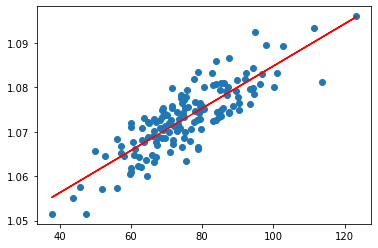

In [36]:
#Extract the B0, B1
print(lr4.params)
b5=lr4.params[0]
b6=lr4.params[1]

#Plot the fitted line on training data
plt.scatter(x1_train, y1_train)
plt.plot(x1_train, b5+ b6*x1_train, 'r')
plt.show()

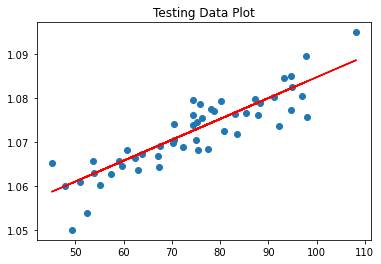

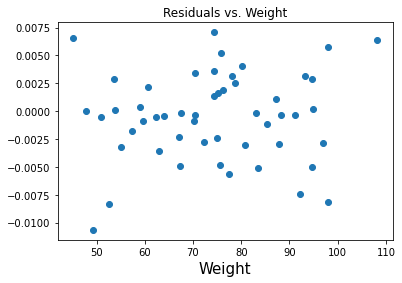

In [37]:
#Plot the fitted line on test data

x1_test_with_intercept = sm.add_constant(x1_test)
y1_test_fitted = lr4.predict(x1_test_with_intercept)


plt.scatter(x1_test, y1_test)
plt.plot(x1_test, y1_test_fitted, 'r')
plt.title('Testing Data Plot')
plt.show()

#Evaluate variance
#Diagnostics
test_residuals1=(y1_test-y1_test_fitted)
len(y1_test)
len(y1_test_fitted)
len(test_residuals1)

#Residuals vs. predictor
plt.title('Residuals vs. Weight')
plt.xlabel('Weight',fontsize=15)
plt.scatter(x1_test, test_residuals1)
plt.show()

Now we don't have non-constant variance and also a good R-squared value than the earlier one. The test set is also fitting almost perfectly with the best fit line generated by the model.